## 5. 서울시 지하철 이용 데이터 분석 
✅ 2018년부터 2021년까지 승/하차인원 데이터를 가지고 가장 많이 이용한 역 TOP10을 알아봄<br>
➡️ 코로나 이전과 이후를 비교했을 때, 지하철 이용에 어떤 차이가 있는지 알아보기 위함!

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns

%matplotlib inline
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [2]:
# 서울특별시에 속한 지하철역으로 정제된 데이터
df = pd.read_csv('data/서울시 지하철역 데이터.csv')
df

,Unnamed: 0,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,0,202202,1호선,동대문,649,13,9562,1450,6553,4490,...,5934,18,1028,0,0,0,0,0,0,20220303
1,1,202202,1호선,동묘앞,105,2,2051,668,2419,3514,...,1713,6,862,0,0,0,0,0,0,20220303
2,2,202202,1호선,서울역,392,4,6620,4825,8866,28412,...,5067,21,413,0,0,0,0,0,0,20220303
3,3,202202,1호선,시청,31,0,1418,4040,2260,15348,...,835,3,78,0,0,0,0,0,0,20220303
4,4,202202,1호선,신설동,199,6,6030,1997,6341,8440,...,3656,14,455,0,0,0,0,0,0,20220303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30761,50190,201501,중앙선,상봉,404,4,4870,936,6953,2947,...,6543,73,2139,0,0,0,0,0,0,20151223
30762,50194,201501,중앙선,양원,18,0,1401,149,2084,1692,...,1587,44,339,0,0,0,0,0,0,20151223
30763,50196,201501,중앙선,양평,9,0,1625,52,2169,1317,...,3691,163,1711,0,0,0,0,0,0,20151223
30764,50201,201501,중앙선,중랑,14,1,4929,424,8539,2084,...,6501,86,1617,0,0,0,0,0,0,20151223


In [4]:
# 2018년부터 2021년 데이터로만 추출
df = df[(df['사용월']>=201800) & (df['사용월']<202200)]
del df['Unnamed: 0']
del df['작업일자']
df

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원
729,202112,1호선,동대문,803,15,12276,1913,8716,5492,13464,...,2617,7679,24,1355,0,0,0,0,0,0
730,202112,1호선,동묘앞,116,0,2423,756,3270,3915,5412,...,980,2491,10,1437,1,1,0,1,0,0
731,202112,1호선,서울역,769,16,8460,6094,11185,35735,34375,...,12519,8703,61,841,0,2,0,0,0,0
732,202112,1호선,시청,37,2,1902,4537,2827,19095,6322,...,5284,1713,28,153,0,1,0,0,0,0
733,202112,1호선,신설동,383,6,7270,2738,7731,10318,15891,...,2280,5913,37,863,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18237,201801,중앙선,상봉,387,4,5302,886,7368,3044,20490,...,1527,6731,289,2137,0,0,0,0,0,0
18238,201801,중앙선,양원,3,0,1325,101,1924,1410,6069,...,216,1306,12,281,0,0,0,0,0,0
18239,201801,중앙선,양평,20,2,1568,177,2261,1525,11126,...,953,5013,162,1786,0,0,0,0,0,0
18240,201801,중앙선,중랑,29,0,4975,509,9419,2199,23173,...,1414,6208,86,1346,0,0,0,0,0,0


In [5]:
# 상/하반기로 나눠 보기 위해 term 이라는 컬럼 제작
term = []
for item in df['사용월']:
    if item >= 202107:
        term.append('2021 2H')
    elif item >= 202100:
        term.append('2021 1H')
    elif item >= 202007:
        term.append('2020 2H')
    elif item >= 202000:
        term.append('2020 1H')
    elif item >= 201907:
        term.append('2019 2H')
    elif item >= 201900:
        term.append('2019 1H')
    elif item >= 201807:
        term.append('2018 2H')
    elif item >= 201800:
        term.append('2018 1H')
    else:
        term.append(item)  

df.insert(1,'term',term)
df

,사용월,term,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,...,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원
729,202112,2021 2H,1호선,동대문,803,15,12276,1913,8716,5492,...,2617,7679,24,1355,0,0,0,0,0,0
730,202112,2021 2H,1호선,동묘앞,116,0,2423,756,3270,3915,...,980,2491,10,1437,1,1,0,1,0,0
731,202112,2021 2H,1호선,서울역,769,16,8460,6094,11185,35735,...,12519,8703,61,841,0,2,0,0,0,0
732,202112,2021 2H,1호선,시청,37,2,1902,4537,2827,19095,...,5284,1713,28,153,0,1,0,0,0,0
733,202112,2021 2H,1호선,신설동,383,6,7270,2738,7731,10318,...,2280,5913,37,863,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18237,201801,2018 1H,중앙선,상봉,387,4,5302,886,7368,3044,...,1527,6731,289,2137,0,0,0,0,0,0
18238,201801,2018 1H,중앙선,양원,3,0,1325,101,1924,1410,...,216,1306,12,281,0,0,0,0,0,0
18239,201801,2018 1H,중앙선,양평,20,2,1568,177,2261,1525,...,953,5013,162,1786,0,0,0,0,0,0
18240,201801,2018 1H,중앙선,중랑,29,0,4975,509,9419,2199,...,1414,6208,86,1346,0,0,0,0,0,0


In [6]:
df['term'].unique()

array(['2021 2H', '2021 1H', '2020 2H', '2020 1H', '2019 2H', '2019 1H',
       '2018 2H', '2018 1H'], dtype=object)

## 승차 기준 이용량 TOP10 역 구하기

In [6]:
# 승차(get_on) 데이터 만들기 - "하차" 열 삭제

get_on = df.copy() # 깊은 복사

del get_on['사용월']

for column in get_on.columns.tolist():
    if column.find('하차') != -1:
        del get_on[column]

In [7]:
get_on

,term,호선명,지하철역,04시-05시 승차인원,05시-06시 승차인원,06시-07시 승차인원,07시-08시 승차인원,08시-09시 승차인원,09시-10시 승차인원,10시-11시 승차인원,...,18시-19시 승차인원,19시-20시 승차인원,20시-21시 승차인원,21시-22시 승차인원,22시-23시 승차인원,23시-24시 승차인원,00시-01시 승차인원,01시-02시 승차인원,02시-03시 승차인원,03시-04시 승차인원
729,2021 2H,1호선,동대문,803,12276,8716,13464,18832,16495,14912,...,21648,14558,12493,11616,7600,2617,24,0,0,0
730,2021 2H,1호선,동묘앞,116,2423,3270,5412,8890,7427,7697,...,15857,7128,4797,4328,2608,980,10,1,0,0
731,2021 2H,1호선,서울역,769,8460,11185,34375,55770,43790,44195,...,184200,87213,62761,70343,38334,12519,61,0,0,0
732,2021 2H,1호선,시청,37,1902,2827,6322,7816,8475,10058,...,136819,50959,44297,45585,21428,5284,28,0,0,0
733,2021 2H,1호선,신설동,383,7270,7731,15891,24588,16025,14137,...,54451,19057,13301,11994,6876,2280,37,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18237,2018 1H,중앙선,상봉,387,5302,7368,20490,23265,12435,9112,...,10868,7039,6189,5057,5042,1527,289,0,0,0
18238,2018 1H,중앙선,양원,3,1325,1924,6069,4276,2742,2308,...,2345,1418,781,803,599,216,12,0,0,0
18239,2018 1H,중앙선,양평,20,1568,2261,11126,6725,6143,7200,...,6990,3465,3075,2773,1964,953,162,0,0,0
18240,2018 1H,중앙선,중랑,29,4975,9419,23173,24561,12865,10380,...,9025,5763,4002,3410,2684,1414,86,0,0,0


In [8]:
# (term, 호선, 지하철역)으로 피벗테이블 생성
get_on_group = pd.pivot_table(get_on, index=['term','호선명','지하철역'],aggfunc=np.sum)
get_on_group

00시-01시 승차인원  01시-02시 승차인원  02시-03시 승차인원  03시-04시 승차인원  \
term    호선명 지하철역                                                           
2018 1H 1호선 동대문           6204            20             0             0   
            동묘앞           1541            27             1             0   
            서울역          26878           355             0             0   
            시청            6573            19             1             0   
            신설동           3634             7             0             0   
...                        ...           ...           ...           ...   
2021 2H 중앙선 상봉             177             0             0             0   
            양원               4             0             0             0   
            양평              58             0             0             0   
            중랑              39             0             0             0   
            회기             588             0             0             0   

                  04시-05시 승차인원  05시-06시 승차인원  06시-07시 승차인원  07시-08시 승차인원  \
term    호선명 지하철역                                                           
2018 1H 1호선 동대문           3959         91479         70887        111427   
            동묘앞            696         20061         23121         41735   
            서울역           6143         67001         85806        231320   
            시청             554         13972         21800         44615   
            신설동           1579         52771         63214        127807   
...                        ...           ...           ...           ...   
2021 2H 중앙선 상봉            3872         37754         49226        118528   
            양원             231         10225         13200         33792   
            양평             294          7475         18172         32740   
            중랑            1020         35140         54594        125145   
            회기            4239         68292        113253        300540   

                  08시-09시 승차인원  09시-10시 승차인원  ...  14시-15시 승차인원  15시-16시 승차인원  \
term    호선명 지하철역                              ...                               
2018 1H 1호선 동대문         156831        144084  ...        199491        201167   
            동묘앞          58737         57651  ...        197024        216177   
            서울역         424047        317906  ...        482682        626203   
            시청           60283         77039  ...        228459        288284   
            신설동         177663        135294  ...        164733        176722   
...                        ...           ...  ...           ...           ...   
2021 2H 중앙선 상봉          133498         74505  ...         43917         41781   
            양원           26510         19105  ...         15347         23550   
            양평           28899         24467  ...         35308         34254   
            중랑          118494         82856  ...         41838         40141   
            회기          389386        252008  ...        210667        232197   

                  16시-17시 승차인원  17시-18시 승차인원  18시-19시 승차인원  19시-20시 승차인원  \
term    호선명 지하철역                                                           
2018 1H 1호선 동대문         202555        205829        203586        147538   
            동묘앞         219452        203810        178505         91103   
            서울역         680998        885650       1351380        793789   
            시청          318311        433853        868464        437442   
            신설동         196474        250758        399985        189576   
...                        ...           ...           ...           ...   
2021 2H 중앙선 상봉           41652         48895         54594         37335   
            양원           29733         23800         15072          7800   
            양평           43674         38894         33205         17001   
            중랑           40411         39172         40733         26082   
            회기          247871        312205        253943        142201  

In [9]:
get_on_group.insert(0,'total',get_on_group.sum(axis=1))
get_on_group.head()

total  00시-01시 승차인원  01시-02시 승차인원  02시-03시 승차인원  \
term    호선명 지하철역                                                      
2018 1H 1호선 동대문   2743262          6204            20             0   
            동묘앞   1887741          1541            27             1   
            서울역   9704089         26878           355             0   
            시청    4354368          6573            19             1   
            신설동   2880608          3634             7             0   

                  03시-04시 승차인원  04시-05시 승차인원  05시-06시 승차인원  06시-07시 승차인원  \
term    호선명 지하철역                                                           
2018 1H 1호선 동대문              0          3959         91479         70887   
            동묘앞              0           696         20061         23121   
            서울역              0          6143         67001         85806   
            시청               0           554         13972         21800   
            신설동              0          1579         52771         63214   

                  07시-08시 승차인원  08시-09시 승차인원  ...  14시-15시 승차인원  15시-16시 승차인원  \
term    호선명 지하철역                              ...                               
2018 1H 1호선 동대문         111427        156831  ...        199491        201167   
            동묘앞          41735         58737  ...        197024        216177   
            서울역         231320        424047  ...        482682        626203   
            시청           44615         60283  ...        228459        288284   
            신설동         127807        177663  ...        164733        176722   

                  16시-17시 승차인원  17시-18시 승차인원  18시-19시 승차인원  19시-20시 승차인원  \
term    호선명 지하철역                                                           
2018 1H 1호선 동대문         202555        205829        203586        147538   
            동묘앞         219452        203810        178505         91103   
            서울역         680998        885650       1351380        793789   
            시청          318311        433853        868464        437442   
            신설동         196474        250758        399985        189576   

                  20시-21시 승차인원  21시-22시 승차인원  22시-23시 승차인원  23시-24시 승차인원  
term    호선명 지하철역                                                          
2018 1H 1호선 동대문         115607        106464         94258         52700  
            동묘앞          50645         41790         30157         15130  
            서울역         562547        589798        413670        180740  
            시청          329914        345631        230978         87883  
            신설동         123099        111431         85098         37555  

[5 rows x 25 columns]

In [10]:
f18 = get_on_group.loc['2018 1H']
top_f18 = f18.sort_values(by='total',ascending=False)[:10]

f18_on = top_f18.reset_index(inplace=False)

f18_on = f18_on[["호선명","지하철역","total"]]

f18_on['term'] = '2018 1H'
f18_on

,호선명,지하철역,total,term
0,2호선,강남,18498790,2018 1H
1,2호선,잠실,16137870,2018 1H
2,2호선,홍대입구,14450392,2018 1H
3,2호선,신림,12700076,2018 1H
4,2호선,구로디지털단지,11307498,2018 1H
5,3호선,고속터미널,11021047,2018 1H
6,2호선,신도림,10808662,2018 1H
7,2호선,삼성,10382134,2018 1H
8,2호선,선릉,9808541,2018 1H
9,1호선,서울역,9704089,2018 1H


In [11]:
s18 = get_on_group.loc['2018 2H']
top_s18 = s18.sort_values(by='total',ascending=False)[:10]

s18_on = top_s18.reset_index(inplace=False)

s18_on = s18_on[["호선명","지하철역","total"]]

s18_on['term'] = '2018 2H'
s18_on

,호선명,지하철역,total,term
0,2호선,강남,18471750,2018 2H
1,2호선,잠실,16643231,2018 2H
2,2호선,홍대입구,14593582,2018 2H
3,2호선,신림,12778196,2018 2H
4,3호선,고속터미널,11534027,2018 2H
5,2호선,구로디지털단지,11365726,2018 2H
6,2호선,삼성,11126287,2018 2H
7,2호선,신도림,10934918,2018 2H
8,1호선,서울역,10480942,2018 2H
9,2호선,선릉,9906247,2018 2H


In [12]:
f19 = get_on_group.loc['2019 1H']
top_f19 = f19.sort_values(by='total',ascending=False)[:10]

f19_on = top_f19.reset_index(inplace=False)

f19_on = f19_on[["호선명","지하철역","total"]]

f19_on['term'] = '2019 1H'
f19_on

,호선명,지하철역,total,term
0,2호선,강남,18148024,2019 1H
1,2호선,잠실,15689005,2019 1H
2,2호선,홍대입구,14682181,2019 1H
3,2호선,신림,12831374,2019 1H
4,2호선,구로디지털단지,11421335,2019 1H
5,3호선,고속터미널,11176579,2019 1H
6,2호선,신도림,10692606,2019 1H
7,2호선,삼성,10611401,2019 1H
8,1호선,서울역,10336755,2019 1H
9,2호선,선릉,9733782,2019 1H


In [13]:
s19 = get_on_group.loc['2019 2H']
top_s19 = s19.sort_values(by='total',ascending=False)[:10]

s19_on = top_s19.reset_index(inplace=False)

s19_on = s19_on[["호선명","지하철역","total"]]

s19_on['term'] = '2019 2H'
s19_on

,호선명,지하철역,total,term
0,2호선,강남,18284655,2019 2H
1,2호선,잠실,15982691,2019 2H
2,2호선,홍대입구,14795262,2019 2H
3,2호선,신림,12849480,2019 2H
4,2호선,구로디지털단지,11527075,2019 2H
5,3호선,고속터미널,11401816,2019 2H
6,2호선,삼성,11221811,2019 2H
7,2호선,신도림,10805788,2019 2H
8,1호선,서울역,10536890,2019 2H
9,2호선,선릉,9975887,2019 2H


In [14]:
f20 = get_on_group.loc['2020 1H']
top_f20 = f20.sort_values(by='total',ascending=False)[:10]

f20_on = top_f20.reset_index(inplace=False)

f20_on = f20_on[["호선명","지하철역","total"]]

f20_on['term'] = '2020 1H'
f20_on

,호선명,지하철역,total,term
0,2호선,강남,13683304,2020 1H
1,2호선,잠실,10753067,2020 1H
2,2호선,신림,10176707,2020 1H
3,2호선,구로디지털단지,9149042,2020 1H
4,2호선,홍대입구,9103019,2020 1H
5,2호선,선릉,8085381,2020 1H
6,2호선,신도림,7810809,2020 1H
7,2호선,삼성,7605846,2020 1H
8,2호선,서울대입구,7526475,2020 1H
9,2호선,역삼,7039618,2020 1H


In [15]:
s20 = get_on_group.loc['2020 2H']
top_s20 = s20.sort_values(by='total',ascending=False)[:10]

s20_on = top_s20.reset_index(inplace=False)

s20_on = s20_on[["호선명","지하철역","total"]]

s20_on['term'] = '2020 2H'
s20_on

,호선명,지하철역,total,term
0,2호선,강남,12151855,2020 2H
1,2호선,잠실,9728297,2020 2H
2,2호선,신림,9592987,2020 2H
3,2호선,구로디지털단지,8769894,2020 2H
4,2호선,홍대입구,7687125,2020 2H
5,2호선,선릉,7649903,2020 2H
6,2호선,신도림,7410341,2020 2H
7,2호선,삼성,7194735,2020 2H
8,2호선,서울대입구,7154376,2020 2H
9,2호선,역삼,6673217,2020 2H


In [16]:
f21 = get_on_group.loc['2021 1H']
top_f21 = f21.sort_values(by='total',ascending=False)[:10]

f21_on = top_f21.reset_index(inplace=False)

f21_on = f21_on[["호선명","지하철역","total"]]

f21_on['term'] = '2021 1H'
f21_on

,호선명,지하철역,total,term
0,2호선,강남,12276255,2021 1H
1,2호선,잠실,10115844,2021 1H
2,2호선,신림,9603333,2021 1H
3,2호선,구로디지털단지,8884470,2021 1H
4,2호선,홍대입구,8231173,2021 1H
5,2호선,선릉,7701512,2021 1H
6,2호선,신도림,7435551,2021 1H
7,2호선,삼성,7227605,2021 1H
8,2호선,서울대입구,7181876,2021 1H
9,2호선,역삼,6913529,2021 1H


In [17]:
s21 = get_on_group.loc['2021 2H']
top_s21 = s21.sort_values(by='total',ascending=False)[:10]

s21_on = top_s21.reset_index(inplace=False)

s21_on = s21_on[["호선명","지하철역","total"]]

s21_on['term'] = '2021 2H'
s21_on

,호선명,지하철역,total,term
0,2호선,강남,12101588,2021 2H
1,2호선,잠실,10414146,2021 2H
2,2호선,신림,9668790,2021 2H
3,2호선,구로디지털단지,8657132,2021 2H
4,2호선,홍대입구,8321932,2021 2H
5,2호선,선릉,7694313,2021 2H
6,2호선,신도림,7295628,2021 2H
7,2호선,서울대입구,7246004,2021 2H
8,2호선,삼성,7239889,2021 2H
9,2호선,역삼,6894624,2021 2H


In [18]:
# 2021년 상반기부터 2018년 하반기까지 뽑아놓은 top10 데이터를 합쳐서 저장
top_on_df = pd.concat([f21_on,s21_on,f20_on,s20_on,f19_on,s19_on,f18_on,s18_on])
top_on_df

,호선명,지하철역,total,term
0,2호선,강남,12276255,2021 1H
1,2호선,잠실,10115844,2021 1H
2,2호선,신림,9603333,2021 1H
3,2호선,구로디지털단지,8884470,2021 1H
4,2호선,홍대입구,8231173,2021 1H
...,...,...,...,...
5,2호선,구로디지털단지,11365726,2018 2H
6,2호선,삼성,11126287,2018 2H
7,2호선,신도림,10934918,2018 2H
8,1호선,서울역,10480942,2018 2H


## 하차 기준 이용량 TOP10 역 구하기

In [20]:
# 하차(get_off) 데이터 만들기 - "승차" 열 삭제

get_off = df.copy() # 깊은 복사

del get_off['사용월']

for column in get_off.columns.tolist():
    if column.find('승차') != -1:
        del get_off[column]

In [21]:
get_off

,term,호선명,지하철역,04시-05시 하차인원,05시-06시 하차인원,06시-07시 하차인원,07시-08시 하차인원,08시-09시 하차인원,09시-10시 하차인원,10시-11시 하차인원,...,18시-19시 하차인원,19시-20시 하차인원,20시-21시 하차인원,21시-22시 하차인원,22시-23시 하차인원,23시-24시 하차인원,00시-01시 하차인원,01시-02시 하차인원,02시-03시 하차인원,03시-04시 하차인원
729,2021 2H,1호선,동대문,15,1913,5492,10014,21879,20889,18816,...,17667,17404,11780,11104,8620,7679,1355,0,0,0
730,2021 2H,1호선,동묘앞,0,756,3915,7362,18151,14958,16182,...,8412,6011,4448,4922,3963,2491,1437,1,1,0
731,2021 2H,1호선,서울역,16,6094,35735,85455,188733,121596,62290,...,77500,50899,33524,32014,18709,8703,841,2,0,0
732,2021 2H,1호선,시청,2,4537,19095,56046,168744,78172,32091,...,20216,9584,5619,5417,2794,1713,153,1,0,0
733,2021 2H,1호선,신설동,6,2738,10318,21124,58444,32087,20784,...,24853,17181,11550,12367,8680,5913,863,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18237,2018 1H,중앙선,상봉,4,886,3044,5550,8981,6169,5398,...,18816,20225,12501,9713,10724,6731,2137,0,0,0
18238,2018 1H,중앙선,양원,0,101,1410,2299,4023,2305,2278,...,3629,4045,2613,1658,1664,1306,281,0,0,0
18239,2018 1H,중앙선,양평,2,177,1525,3251,6760,5052,4950,...,7945,7423,6800,4392,3560,5013,1786,0,0,0
18240,2018 1H,중앙선,중랑,0,509,2199,3752,7993,5177,5295,...,19655,21676,12353,10002,10262,6208,1346,0,0,0


In [22]:
# (term, 호선, 지하철역)으로 피벗테이블 생성
get_off_group = pd.pivot_table(get_off, index=['term','호선명','지하철역'],aggfunc=np.sum)
get_off_group.insert(0,'total',get_off_group.sum(axis=1))
get_off_group

total  00시-01시 하차인원  01시-02시 하차인원  02시-03시 하차인원  \
term    호선명 지하철역                                                      
2018 1H 1호선 동대문   3044774         27953           468             0   
            동묘앞   1977668         20111          1496            19   
            서울역   9401854         48147          3026             3   
            시청    4316697          7981           117             2   
            신설동   2812885         17772            55             1   
...                   ...           ...           ...           ...   
2021 2H 중앙선 상봉     941482          5197             0             0   
            양원     292863           256             0             0   
            양평     480659           931             0             0   
            중랑     841811          1463             0             0   
            회기    3613503         15408             0             0   

                  03시-04시 하차인원  04시-05시 하차인원  05시-06시 하차인원  06시-07시 하차인원  \
term    호선명 지하철역                                                           
2018 1H 1호선 동대문              0            94         14178         50515   
            동묘앞              0            32          5023         21921   
            서울역              0           242         50369        306746   
            시청               0           103         25497        137922   
            신설동              0           164         14558         47352   
...                        ...           ...           ...           ...   
2021 2H 중앙선 상봉               0            51          4113         13173   
            양원               0             0          2378         15313   
            양평               0             6           473         13099   
            중랑               0            21          3529         12615   
            회기               0            47         20412         66405   

                  07시-08시 하차인원  08시-09시 하차인원  ...  14시-15시 하차인원  15시-16시 하차인원  \
term    호선명 지하철역                              ...                               
2018 1H 1호선 동대문          87581        189302  ...        213704        202821   
            동묘앞          65154        162910  ...        207034        175932   
            서울역         631164       1324024  ...        489612        505781   
            시청          417058       1074748  ...        221355        184242   
            신설동         169443        430066  ...        137420        141771   
...                        ...           ...  ...           ...           ...   
2021 2H 중앙선 상봉           27282         45420  ...         41954         51880   
            양원           34614         30769  ...         12709         14196   
            양평           20573         39662  ...         30945         33526   
            중랑           16814         35496  ...         38024         51743   
            회기          153444        272733  ...        171409        182145   

                  16시-17시 하차인원  17시-18시 하차인원  18시-19시 하차인원  19시-20시 하차인원  \
term    호선명 지하철역                                                           
2018 1H 1호선 동대문         184792        186700        188545        194080   
            동묘앞         134560        105107         77321         55855   
            서울역         520711        559332        600603        484720   
            시청          161562        161169        169936         99528   
            신설동         139712        171523        180712        153479   
...                        ...           ...           ...           ...   
2021 2H 중앙선 상봉           57486         75994        132143        113288   
            양원           16402         18336         28753         19611   
            양평           28519         38263         34365         24342   
            중랑           61341         84349        129092         84152   
            회기          204466        273991        399728        314491   

                  20시-21시 하차인원  21시-22시 하차인원  22시-23시 하차인원  23시-

In [23]:
f18 = get_off_group.loc['2018 1H']
top_f18 = f18.sort_values(by='total',ascending=False)[:10]

f18_off = top_f18.reset_index(inplace=False)

f18_off = f18_off[["호선명","지하철역","total"]]

f18_off['term'] = '2018 1H'
f18_off

,호선명,지하철역,total,term
0,2호선,강남,18639143,2018 1H
1,2호선,홍대입구,15410402,2018 1H
2,2호선,잠실,15236194,2018 1H
3,2호선,신림,12481174,2018 1H
4,2호선,구로디지털단지,11279880,2018 1H
5,2호선,신도림,10737908,2018 1H
6,2호선,삼성,10628840,2018 1H
7,3호선,고속터미널,10476265,2018 1H
8,1호선,서울역,9401854,2018 1H
9,2호선,서울대입구,9344074,2018 1H


In [24]:
s18 = get_off_group.loc['2018 2H']
top_s18 = s18.sort_values(by='total',ascending=False)[:10]

s18_off = top_s18.reset_index(inplace=False)

s18_off = s18_off[["호선명","지하철역","total"]]

s18_off['term'] = '2018 2H'
s18_off

,호선명,지하철역,total,term
0,2호선,강남,18735406,2018 2H
1,2호선,잠실,15844368,2018 2H
2,2호선,홍대입구,15639603,2018 2H
3,2호선,신림,12512667,2018 2H
4,2호선,삼성,11411420,2018 2H
5,2호선,구로디지털단지,11323547,2018 2H
6,3호선,고속터미널,10989026,2018 2H
7,2호선,신도림,10861091,2018 2H
8,1호선,서울역,9826351,2018 2H
9,경부선,영등포,9530403,2018 2H


In [25]:
f19 = get_off_group.loc['2019 1H']
top_f19 = f19.sort_values(by='total',ascending=False)[:10]

f19_off = top_f19.reset_index(inplace=False)

f19_off = f19_off[["호선명","지하철역","total"]]

f19_off['term'] = '2019 1H'
f19_off

,호선명,지하철역,total,term
0,2호선,강남,18470209,2019 1H
1,2호선,홍대입구,15683568,2019 1H
2,2호선,잠실,15054334,2019 1H
3,2호선,신림,12521358,2019 1H
4,2호선,구로디지털단지,11418619,2019 1H
5,2호선,삼성,10872040,2019 1H
6,3호선,고속터미널,10635958,2019 1H
7,2호선,신도림,10605144,2019 1H
8,1호선,서울역,9750199,2019 1H
9,경부선,영등포,9432067,2019 1H


In [26]:
s19 = get_off_group.loc['2019 2H']
top_s19 = s19.sort_values(by='total',ascending=False)[:10]

s19_off = top_s19.reset_index(inplace=False)

s19_off = s19_off[["호선명","지하철역","total"]]

s19_off['term'] = '2019 2H'
s19_off

,호선명,지하철역,total,term
0,2호선,강남,18727311,2019 2H
1,2호선,홍대입구,15961485,2019 2H
2,2호선,잠실,15417897,2019 2H
3,2호선,신림,12448247,2019 2H
4,2호선,구로디지털단지,11527686,2019 2H
5,2호선,삼성,11443508,2019 2H
6,3호선,고속터미널,10924162,2019 2H
7,2호선,신도림,10762596,2019 2H
8,1호선,서울역,9995837,2019 2H
9,경부선,영등포,9665880,2019 2H


In [27]:
# 20년 상반기
f20 = get_off_group.loc['2020 1H']
top_f20 = f20.sort_values(by='total',ascending=False)[:10]

f20_off = top_f20.reset_index(inplace=False)

f20_off = f20_off[["호선명","지하철역","total"]]

f20_off['term'] = '2020 1H'
f20_off

,호선명,지하철역,total,term
0,2호선,강남,13853429,2020 1H
1,2호선,잠실,10443438,2020 1H
2,2호선,신림,9822547,2020 1H
3,2호선,홍대입구,9708390,2020 1H
4,2호선,구로디지털단지,9150298,2020 1H
5,2호선,역삼,7800648,2020 1H
6,2호선,삼성,7771995,2020 1H
7,2호선,신도림,7707919,2020 1H
8,2호선,서울대입구,7323084,2020 1H
9,2호선,선릉,7220040,2020 1H


In [28]:
s20 = get_off_group.loc['2020 2H']
top_s20 = s20.sort_values(by='total',ascending=False)[:10]

s20_off = top_s20.reset_index(inplace=False)

s20_off = s20_off[["호선명","지하철역","total"]]

s20_off['term'] = '2020 2H'
s20_off

,호선명,지하철역,total,term
0,2호선,강남,12209256,2020 2H
1,2호선,잠실,9596518,2020 2H
2,2호선,신림,9244824,2020 2H
3,2호선,구로디지털단지,8775017,2020 2H
4,2호선,홍대입구,8225907,2020 2H
5,2호선,역삼,7365083,2020 2H
6,2호선,삼성,7321388,2020 2H
7,2호선,신도림,7282081,2020 2H
8,2호선,서울대입구,6945654,2020 2H
9,2호선,선릉,6844361,2020 2H


In [29]:
f21 = get_off_group.loc['2021 1H']
top_f21 = f21.sort_values(by='total',ascending=False)[:10]

f21_off = top_f21.reset_index(inplace=False)

f21_off = f21_off[["호선명","지하철역","total"]]

f21_off['term'] = '2021 1H'
f21_off

,호선명,지하철역,total,term
0,2호선,강남,12025451,2021 1H
1,2호선,잠실,9949913,2021 1H
2,2호선,신림,9342202,2021 1H
3,2호선,구로디지털단지,8893600,2021 1H
4,2호선,홍대입구,8563452,2021 1H
5,2호선,역삼,7577260,2021 1H
6,2호선,삼성,7292576,2021 1H
7,2호선,신도림,7291817,2021 1H
8,2호선,서울대입구,7063396,2021 1H
9,2호선,선릉,6873786,2021 1H


In [30]:
s21 = get_off_group.loc['2021 2H']
top_s21 = s21.sort_values(by='total',ascending=False)[:10]

s21_off = top_s21.reset_index(inplace=False)

s21_off = s21_off[["호선명","지하철역","total"]]

s21_off['term'] = '2021 2H'
s21_off

,호선명,지하철역,total,term
0,2호선,강남,11913698,2021 2H
1,2호선,잠실,10270509,2021 2H
2,2호선,신림,9380168,2021 2H
3,2호선,홍대입구,8672368,2021 2H
4,2호선,구로디지털단지,8670904,2021 2H
5,2호선,역삼,7618611,2021 2H
6,2호선,삼성,7303062,2021 2H
7,2호선,신도림,7192101,2021 2H
8,2호선,서울대입구,7121381,2021 2H
9,2호선,선릉,6843750,2021 2H


In [31]:
top_off_df = pd.concat([f21_off,s21_off,f20_off,s20_off,f19_off,s19_off,f18_off,s18_off])
top_off_df

,호선명,지하철역,total,term
0,2호선,강남,12025451,2021 1H
1,2호선,잠실,9949913,2021 1H
2,2호선,신림,9342202,2021 1H
3,2호선,구로디지털단지,8893600,2021 1H
4,2호선,홍대입구,8563452,2021 1H
...,...,...,...,...
5,2호선,구로디지털단지,11323547,2018 2H
6,3호선,고속터미널,10989026,2018 2H
7,2호선,신도림,10861091,2018 2H
8,1호선,서울역,9826351,2018 2H


## 시각화

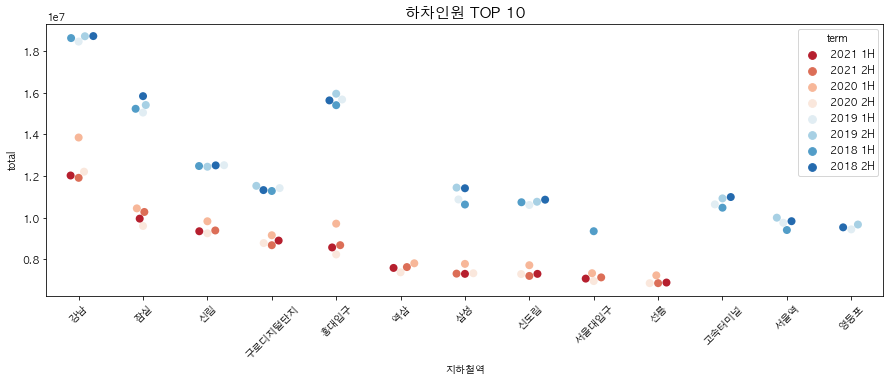

In [32]:
plt.rcParams['figure.figsize'] = [15,5] # [width, height]
plt.figure(figsize=(15,5))
sns.swarmplot(data=top_off_df, x="지하철역", y="total", hue="term", size=8, palette=("RdBu"))
plt.xticks(rotation = 45)
plt.title("하차인원 TOP 10", fontsize=15)
plt.show()

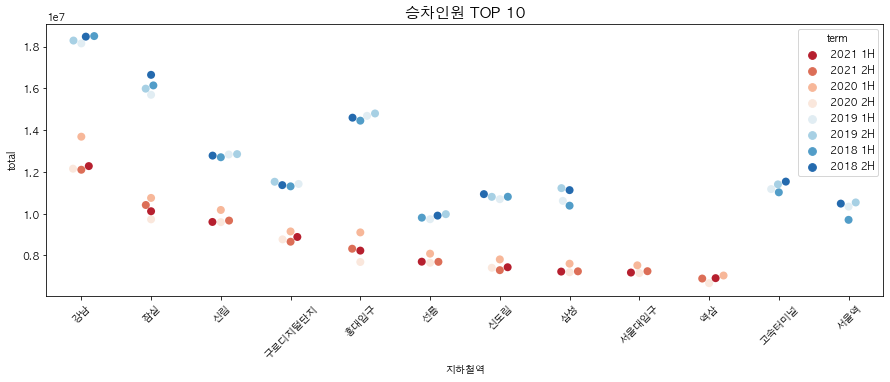

In [33]:
plt.rcParams['figure.figsize'] = [15,5] # [width, height]
plt.figure(figsize=(15,5))
sns.swarmplot(data=top_on_df, x="지하철역", y="total", hue="term", size=8, palette=("RdBu"))
plt.xticks(rotation = 45)
plt.title("승차인원 TOP 10",fontsize=15)
plt.show()

## 💡 승/하차 데이터가 비슷한 모습을 보이고 있다. 
전체적으로 이용량이 감소했고, 자주 이용하는 역들은 비슷하다.<br>그런데 18,19년도에 보였던 고속터미널, 서울역, 영등포가 2020년(코로나) 이후에는 보이지 않고 대신 2호선의 다른 역들로 채워졌다<br>
고터, 서울역, 영등포는 외지인이 서울로 갈 때 많이 이용하는 역! <br> 
***➡️ 2020년 이후로는 코로나 여파로 직장인이 자주 이용하는 역의 순위가 높아진 것이 아닐까?*** <br>
## 그래서 코로나 이후 시기 중 한 시점을 골라 호선별로 시간에 따른 이용량을 알아보았다
✓ 2021년 3월을 기준으로 함

In [21]:
# 서울특별시에 속한 지하철역으로 정제된 데이터
df = pd.read_csv('data/서울시 지하철역 데이터.csv')
df

,Unnamed: 0,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,0,202202,1호선,동대문,649,13,9562,1450,6553,4490,...,5934,18,1028,0,0,0,0,0,0,20220303
1,1,202202,1호선,동묘앞,105,2,2051,668,2419,3514,...,1713,6,862,0,0,0,0,0,0,20220303
2,2,202202,1호선,서울역,392,4,6620,4825,8866,28412,...,5067,21,413,0,0,0,0,0,0,20220303
3,3,202202,1호선,시청,31,0,1418,4040,2260,15348,...,835,3,78,0,0,0,0,0,0,20220303
4,4,202202,1호선,신설동,199,6,6030,1997,6341,8440,...,3656,14,455,0,0,0,0,0,0,20220303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30761,50190,201501,중앙선,상봉,404,4,4870,936,6953,2947,...,6543,73,2139,0,0,0,0,0,0,20151223
30762,50194,201501,중앙선,양원,18,0,1401,149,2084,1692,...,1587,44,339,0,0,0,0,0,0,20151223
30763,50196,201501,중앙선,양평,9,0,1625,52,2169,1317,...,3691,163,1711,0,0,0,0,0,0,20151223
30764,50201,201501,중앙선,중랑,14,1,4929,424,8539,2084,...,6501,86,1617,0,0,0,0,0,0,20151223


In [22]:
# 2018년부터 2021년 데이터로만 추출
df = df[(df['사용월']>=201800) & (df['사용월']<202200)]
del df['Unnamed: 0']
del df['작업일자']
df

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원
729,202112,1호선,동대문,803,15,12276,1913,8716,5492,13464,...,2617,7679,24,1355,0,0,0,0,0,0
730,202112,1호선,동묘앞,116,0,2423,756,3270,3915,5412,...,980,2491,10,1437,1,1,0,1,0,0
731,202112,1호선,서울역,769,16,8460,6094,11185,35735,34375,...,12519,8703,61,841,0,2,0,0,0,0
732,202112,1호선,시청,37,2,1902,4537,2827,19095,6322,...,5284,1713,28,153,0,1,0,0,0,0
733,202112,1호선,신설동,383,6,7270,2738,7731,10318,15891,...,2280,5913,37,863,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18237,201801,중앙선,상봉,387,4,5302,886,7368,3044,20490,...,1527,6731,289,2137,0,0,0,0,0,0
18238,201801,중앙선,양원,3,0,1325,101,1924,1410,6069,...,216,1306,12,281,0,0,0,0,0,0
18239,201801,중앙선,양평,20,2,1568,177,2261,1525,11126,...,953,5013,162,1786,0,0,0,0,0,0
18240,201801,중앙선,중랑,29,0,4975,509,9419,2199,23173,...,1414,6208,86,1346,0,0,0,0,0,0


In [23]:
# 상/하반기로 나눠 보기 위해 term 이라는 컬럼 제작
term = []
for item in df['사용월']:
    if item >= 202107:
        term.append('2021 2H')
    elif item >= 202100:
        term.append('2021 1H')
    elif item >= 202007:
        term.append('2020 2H')
    elif item >= 202000:
        term.append('2020 1H')
    elif item >= 201907:
        term.append('2019 2H')
    elif item >= 201900:
        term.append('2019 1H')
    elif item >= 201807:
        term.append('2018 2H')
    elif item >= 201800:
        term.append('2018 1H')
    else:
        term.append(item)  

df.insert(1,'term',term)
df

,사용월,term,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,...,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원
729,202112,2021 2H,1호선,동대문,803,15,12276,1913,8716,5492,...,2617,7679,24,1355,0,0,0,0,0,0
730,202112,2021 2H,1호선,동묘앞,116,0,2423,756,3270,3915,...,980,2491,10,1437,1,1,0,1,0,0
731,202112,2021 2H,1호선,서울역,769,16,8460,6094,11185,35735,...,12519,8703,61,841,0,2,0,0,0,0
732,202112,2021 2H,1호선,시청,37,2,1902,4537,2827,19095,...,5284,1713,28,153,0,1,0,0,0,0
733,202112,2021 2H,1호선,신설동,383,6,7270,2738,7731,10318,...,2280,5913,37,863,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18237,201801,2018 1H,중앙선,상봉,387,4,5302,886,7368,3044,...,1527,6731,289,2137,0,0,0,0,0,0
18238,201801,2018 1H,중앙선,양원,3,0,1325,101,1924,1410,...,216,1306,12,281,0,0,0,0,0,0
18239,201801,2018 1H,중앙선,양평,20,2,1568,177,2261,1525,...,953,5013,162,1786,0,0,0,0,0,0
18240,201801,2018 1H,중앙선,중랑,29,0,4975,509,9419,2199,...,1414,6208,86,1346,0,0,0,0,0,0


In [24]:
df

,사용월,term,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,...,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원
729,202112,2021 2H,1호선,동대문,803,15,12276,1913,8716,5492,...,2617,7679,24,1355,0,0,0,0,0,0
730,202112,2021 2H,1호선,동묘앞,116,0,2423,756,3270,3915,...,980,2491,10,1437,1,1,0,1,0,0
731,202112,2021 2H,1호선,서울역,769,16,8460,6094,11185,35735,...,12519,8703,61,841,0,2,0,0,0,0
732,202112,2021 2H,1호선,시청,37,2,1902,4537,2827,19095,...,5284,1713,28,153,0,1,0,0,0,0
733,202112,2021 2H,1호선,신설동,383,6,7270,2738,7731,10318,...,2280,5913,37,863,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18237,201801,2018 1H,중앙선,상봉,387,4,5302,886,7368,3044,...,1527,6731,289,2137,0,0,0,0,0,0
18238,201801,2018 1H,중앙선,양원,3,0,1325,101,1924,1410,...,216,1306,12,281,0,0,0,0,0,0
18239,201801,2018 1H,중앙선,양평,20,2,1568,177,2261,1525,...,953,5013,162,1786,0,0,0,0,0,0
18240,201801,2018 1H,중앙선,중랑,29,0,4975,509,9419,2199,...,1414,6208,86,1346,0,0,0,0,0,0


In [25]:
df_202103 = df[df['사용월']==202103]

In [26]:
df_202103 = df_202103.groupby(['사용월','호선명']).apply(sum)
df_202103

사용월                                               term  \
사용월    호선명                                                                     
202103 1호선        2021030  2021 1H2021 1H2021 1H2021 1H2021 1H2021 1H2021...   
       2호선        8892532  2021 1H2021 1H2021 1H2021 1H2021 1H2021 1H2021...   
       3호선        6669399  2021 1H2021 1H2021 1H2021 1H2021 1H2021 1H2021...   
       4호선        5254678  2021 1H2021 1H2021 1H2021 1H2021 1H2021 1H2021...   
       5호선       10307253  2021 1H2021 1H2021 1H2021 1H2021 1H2021 1H2021...   
       6호선        7882017  2021 1H2021 1H2021 1H2021 1H2021 1H2021 1H2021...   
       7호선        7679914  2021 1H2021 1H2021 1H2021 1H2021 1H2021 1H2021...   
       8호선        2223133  2021 1H2021 1H2021 1H2021 1H2021 1H2021 1H2021...   
       9호선        5052575  2021 1H2021 1H2021 1H2021 1H2021 1H2021 1H2021...   
       9호선2~3단계   1414721  2021 1H2021 1H2021 1H2021 1H2021 1H2021 1H2021 1H   
       경부선        2425236  2021 1H2021 1H2021 1H2021 1H2021 1H2021 1H2021...   
       경원선        3435751  2021 1H2021 1H2021 1H2021 1H2021 1H2021 1H2021...   
       경의선        1818927  2021 1H2021 1H2021 1H2021 1H2021 1H2021 1H2021...   
       경인선         808412                       2021 1H2021 1H2021 1H2021 1H   
       경춘선         202103                                            2021 1H   
       공항철도 1호선   1212618         2021 1H2021 1H2021 1H2021 1H2021 1H2021 1H   
       분당선        2425236  2021 1H2021 1H2021 1H2021 1H2021 1H2021 1H2021...   
       우이신설선      2627339  2021 1H2021 1H2021 1H2021 1H2021 1H2021 1H2021...   
       중앙선        1212618         2021 1H2021 1H2021 1H2021 1H2021 1H2021 1H   

                                                               호선명  \
사용월    호선명                                                           
202103 1호선                          1호선1호선1호선1호선1호선1호선1호선1호선1호선1호선   
       2호선       2호선2호선2호선2호선2호선2호선2호선2호선2호선2호선2호선2호선2호선2호선2호선2...   
       3호선       3호선3호선3호선3호선3호선3호선3호선3호선3호선3호선3호선3호선3호선3호선3호선3...   
       4호선       4호선4호선4호선4호선4호선4호선4호선4호선4호선4호선4호선4호선4호선4호선4호선4...   
       5호선       5호선5호선5호선5호선5호선5호선5호선5호선5호선5호선5호선5호선5호선5호선5호선5...   
       6호선       6호선6호선6호선6호선6호선6호선6호선6호선6호선6호선6호선6호선6호선6호선6호선6...   
       7호선       7호선7호선7호선7호선7호선7호선7호선7호선7호선7호선7호선7호선7호선7호선7호선7...   
       8호선                       8호선8호선8호선8호선8호선8호선8호선8호선8호선8호선8호선   
       9호선       9호선9호선9호선9호선9호선9호선9호선9호선9호선9호선9호선9호선9호선9호선9호선9...   
       9호선2~3단계  9호선2~3단계9호선2~3단계9호선2~3단계9호선2~3단계9호선2~3단계9호선2~3...   
       경부선                    경부선경부선경부선경부선경부선경부선경부선경부선경부선경부선경부선경부선   
       경원선       경원선경원선경원선경원선경원선경원선경원선경원선경원선경원선경원선경원선경원선경원선경원선경...   
       경의선                             경의선경의선경의선경의선경의선경의선경의선경의선경의선   
       경인선                                            경인선경인선경인선경인선   
       경춘선                                                     경춘선   
       공항철도 1호선   공항철도 1호선공항철도 1호선공항철도 1호선공항철도 1호선공항철도 1호선공항철도 1호선   
       분당선                    분당선분당선분당선분당선분당선분당선분당선분당선분당선분당선분당선분당선   
       우이신설선     우이신설선우이신설선우이신설선우이신설선우이신설선우이신설선우이신설선우이신설선우이신설선우...   
       중앙선                                      중앙선중앙선중앙선중앙선중앙선중앙선   

                                                              지하철역  \
사용월    호선명                                                           
202103 1호선                          동대문동묘앞서울역시청신설동제기동종각종로3가종로5가청량리   
       2호선       강남강변건대입구교대구로디지털단지구의낙성대당산대림동대문역사문화공원뚝섬문래방배봉천사당삼...   
       3호선       가락시장경복궁경찰병원고속터미널교대구파발금호남부터미널녹번대청대치도곡독립문동대입구매봉무...   
       4호선       길음남태령노원당고개동대문동대문역사문화공원동작명동미아미아사거리사당삼각지상계서울역성신여...   
       5호선       강동개롱개화산거여고덕공덕광나루광화문군자굽은다리길동김포공항까치산답십리동대문역사문화공원...   
       6호선       고려대공덕광흥창구산녹사평대흥독바위돌곶이동묘앞디지털미디어시티마포구청망원버티고개보문봉화...   
       7호선       가산디지털단지강남구청건대입구고속터미널공릉군자남구로남성내방노원논현대림도봉산뚝섬유원지마...   
       8호선                            가락시장강동구청몽촌토성문정복정석촌송파암사잠실장지천호   
       9호선       가양개화고속터미널공항시장구반포국회의사당김포공항노들노량진당산동작등촌마곡나루사평샛강선유...   
       9호선2~3단계                           봉은사삼성중앙석촌선정릉언주올림픽공원종합운동장   
       경부선                    

In [27]:
del df_202103['사용월']
del df_202103['term']
del df_202103['호선명']
del df_202103['지하철역']
df_202103

04시-05시 승차인원  04시-05시 하차인원  05시-06시 승차인원  05시-06시 하차인원  \
사용월    호선명                                                                
202103 1호선               3517            95         55284         32218   
       2호선              11113           147        396737        119429   
       3호선               1763            93        128508         33403   
       4호선               3296            95        178653         32463   
       5호선                680            15        226992         46464   
       6호선               1665            20        138325         31403   
       7호선               1571            17        249121         51667   
       8호선                131             2         52856         18249   
       9호선                611             7         93834         22930   
       9호선2~3단계            31             1          9725          4320   
       경부선              18384           148         93551         29284   
       경원선               9510            81         73015         14141   
       경의선                 37             0          6767          1685   
       경인선               1939            11         38147         10109   
       경춘선                  4             0           658           565   
       공항철도 1호선           280            14         11289          4241   
       분당선                348             5         15663         11263   
       우이신설선               21             5         18430          5092   
       중앙선               1590            39         31939          5633   

                 06시-07시 승차인원  06시-07시 하차인원  07시-08시 승차인원  07시-08시 하차인원  \
사용월    호선명                                                                
202103 1호선              64221        146698        151081        383820   
       2호선             746252        700308       2019706       1842294   
       3호선             315256        315877        858558        797994   
       4호선             409066        246693       1064191        591220   
       5호선             525945        318076       1555945        896275   
       6호선             297564        152133        839569        366800   
       7호선             474229        295093       1263950        718200   
       8호선             112472         83410        323261        192203   
       9호선             200893        157539        584966        441257   
       9호선2~3단계         29837         35719         75146         95878   
       경부선             117118        123846        292534        358698   
       경원선             120187         49019        303869         91182   
       경의선              17824         21671         50162         63301   
       경인선              70755         23867        194708         39469   
       경춘선               1737          3759          5009          4690   
       공항철도 1호선         19554         35464         58435         88036   
       분당선              38890         82797        107879        196909   
       우이신설선            47608         19969        136977         37753   
       중앙선              53876         21450        136507         50944   

                 08시-09시 승차인원  08시-09시 하차인원  ...  23시-24시 승차인원  23시-24시 하차인원  \
사용월    호선명                                   ...                               
202103 1호선             212187        918852  ...         37973         41039   
       2호선            2836700       4753029  ...        259946        549858   
       3호선            1028133       1672794  ...         67542        189000   
       4호선            1149434       1382477  ...         74853        256337   
       5호선            1782033       2124256  ...         82275        304633   
       6호선             990110        874023  ...         64149        200762   
       7호선            1550019       1871632  ...         95541        283064   
       8호선             417855        507209  ...         21510         64327   
       9호선             671267        893981  ...         42294   

In [28]:
df_202103.reset_index(inplace=True)
df_202103

,사용월,호선명,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,07시-08시 하차인원,...,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원
0,202103,1호선,3517,95,55284,32218,64221,146698,151081,383820,...,37973,41039,98,5073,3,3,0,1,0,0
1,202103,2호선,11113,147,396737,119429,746252,700308,2019706,1842294,...,259946,549858,229,30650,14,26,0,3,0,0
2,202103,3호선,1763,93,128508,33403,315256,315877,858558,797994,...,67542,189000,76,13356,1,12,1,0,0,0
3,202103,4호선,3296,95,178653,32463,409066,246693,1064191,591220,...,74853,256337,218,11176,10,2,1,2,0,0
4,202103,5호선,680,15,226992,46464,525945,318076,1555945,896275,...,82275,304633,248,25386,2,2,0,0,0,0
5,202103,6호선,1665,20,138325,31403,297564,152133,839569,366800,...,64149,200762,114,14385,0,2,0,0,0,0
6,202103,7호선,1571,17,249121,51667,474229,295093,1263950,718200,...,95541,283064,274,26877,2,2,0,1,0,0
7,202103,8호선,131,2,52856,18249,112472,83410,323261,192203,...,21510,64327,30,6802,0,0,0,0,0,0
8,202103,9호선,611,7,93834,22930,200893,157539,584966,441257,...,42294,132126,45,4021,0,0,0,1,0,0
9,202103,9호선2~3단계,31,1,9725,4320,29837,35719,75146,95878,...,9475,18918,0,372,0,0,0,0,0,0


In [29]:
data = df_202103

In [30]:
line = []
T_00 = []
T_01 = []
T_02 = []
T_03 = []
T_04 = []
T_05 = []
T_06 = []
T_07 = []
T_08 = []
T_09 = []
T_10 = []
T_11 = []
T_12 = []
T_13 = []
T_14 = []
T_15 = []
T_16 = []
T_17 = []
T_18 = []
T_19 = []
T_20 = []
T_21 = []
T_22 = []
T_23 = []

In [31]:
for i in range(len(data)):
    line.append(data.loc[i,"호선명"])
    
    sum_04 = data.loc[i,"04시-05시 승차인원"] + data.loc[i,"04시-05시 하차인원"]
    sum_05 = data.loc[i,"05시-06시 승차인원"] + data.loc[i,"05시-06시 하차인원"]
    sum_06 = data.loc[i,"06시-07시 승차인원"] + data.loc[i,"06시-07시 하차인원"]
    sum_07 = data.loc[i,"07시-08시 승차인원"] + data.loc[i,"07시-08시 하차인원"] 
    sum_08 = data.loc[i,"08시-09시 승차인원"] + data.loc[i,"08시-09시 하차인원"]
    sum_09 = data.loc[i,"09시-10시 승차인원"] + data.loc[i,"09시-10시 하차인원"]
    sum_10 = data.loc[i,"10시-11시 승차인원"] + data.loc[i,"10시-11시 하차인원"]    
    sum_11 = data.loc[i,"11시-12시 승차인원"] + data.loc[i,"11시-12시 하차인원"]
    sum_12 = data.loc[i,"12시-13시 승차인원"] + data.loc[i,"12시-13시 하차인원"]
    sum_13 = data.loc[i,"13시-14시 승차인원"] + data.loc[i,"13시-14시 하차인원"]
    sum_14 = data.loc[i,"14시-15시 승차인원"] + data.loc[i,"14시-15시 하차인원"] 
    sum_15 = data.loc[i,"15시-16시 승차인원"] + data.loc[i,"15시-16시 하차인원"]
    sum_16 = data.loc[i,"16시-17시 승차인원"] + data.loc[i,"16시-17시 하차인원"]
    sum_17 = data.loc[i,"17시-18시 승차인원"] + data.loc[i,"17시-18시 하차인원"]
    sum_18 = data.loc[i,"18시-19시 승차인원"] + data.loc[i,"18시-19시 하차인원"]
    sum_19 = data.loc[i,"19시-20시 승차인원"] + data.loc[i,"19시-20시 하차인원"]
    sum_20 = data.loc[i,"20시-21시 승차인원"] + data.loc[i,"20시-21시 하차인원"] 
    sum_21 = data.loc[i,"21시-22시 승차인원"] + data.loc[i,"21시-22시 하차인원"]
    sum_22 = data.loc[i,"22시-23시 승차인원"] + data.loc[i,"22시-23시 하차인원"]
    sum_23 = data.loc[i,"23시-24시 승차인원"] + data.loc[i,"23시-24시 하차인원"]  
    sum_00 = data.loc[i,"00시-01시 승차인원"] + data.loc[i,"00시-01시 하차인원"]
    sum_01 = data.loc[i,"01시-02시 승차인원"] + data.loc[i,"01시-02시 하차인원"]
    sum_02 = data.loc[i,"02시-03시 승차인원"] + data.loc[i,"02시-03시 하차인원"]
    sum_03 = data.loc[i,"03시-04시 승차인원"] + data.loc[i,"03시-04시 하차인원"]
    
    T_04.append(sum_04)
    T_05.append(sum_05)
    T_06.append(sum_06)
    T_07.append(sum_07)
    T_08.append(sum_08)
    T_09.append(sum_09)
    T_10.append(sum_10)
    T_11.append(sum_11)
    T_12.append(sum_12)
    T_13.append(sum_13)
    T_14.append(sum_14)
    T_15.append(sum_15)
    T_16.append(sum_16)
    T_17.append(sum_17)
    T_18.append(sum_18)
    T_19.append(sum_19)
    T_20.append(sum_20)
    T_21.append(sum_21)
    T_22.append(sum_22)
    T_23.append(sum_23)
    T_00.append(sum_00)
    T_01.append(sum_01)
    T_02.append(sum_02)
    T_03.append(sum_03)
    
print("line:",line)

line: ['1호선', '2호선', '3호선', '4호선', '5호선', '6호선', '7호선', '8호선', '9호선', '9호선2~3단계', '경부선', '경원선', '경의선', '경인선', '경춘선', '공항철도 1호선', '분당선', '우이신설선', '중앙선']


In [32]:
df = pd.DataFrame({"line":line,
                   "04시-05시":T_04,
                   "05시-06시":T_05,
                   "06시-07시":T_06,
                   "07시-08시":T_07,
                   "08시-09시":T_08,
                   "09시-10시":T_09,
                   "10시-11시":T_10,
                   "11시-12시":T_11,
                   "12시-13시":T_12,
                   "13시-14시":T_13,
                   "14시-15시":T_14,
                   "15시-16시":T_15,
                   "16시-17시":T_16,
                   "17시-18시":T_17,
                   "18시-19시":T_18,
                   "19시-20시":T_19,
                   "20시-21시":T_20,
                   "21시-22시":T_21,
                   "22시-23시":T_22,
                   "23시-24시":T_23,
                   "00시-01시":T_00,
                   "01시-02시":T_01,
                   "02시-03시":T_02,
                   "03시-04시":T_03})

In [33]:
df

,line,04시-05시,05시-06시,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,11시-12시,12시-13시,...,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,00시-01시,01시-02시,02시-03시,03시-04시
0,1호선,3612,87502,210919,534901,1131039,755489,565021,623369,675470,...,1185932,610901,407132,413810,335889,79012,5171,6,1,0
1,2호선,11260,516166,1446560,3862000,7589729,5058605,2896049,2674693,2885533,...,8002658,4917515,3202750,3256548,3220033,809804,30879,40,3,0
2,3호선,1856,161911,631133,1656552,2700927,1823823,1221165,1147737,1209076,...,2868175,1800342,1171063,1067163,972412,256542,13432,13,1,0
3,4호선,3391,211116,655759,1655411,2531911,1596738,1145259,1109687,1185319,...,2610764,1742573,1130019,1073200,971786,331190,11394,12,3,0
4,5호선,695,273456,844021,2452220,3906289,1915930,1234215,1211946,1316815,...,3600619,2205336,1379863,1276251,1203522,386908,25634,4,0,0
5,6호선,1685,169728,449697,1206369,1864133,1031195,691021,669203,741168,...,1755779,1210480,750616,725738,759612,264911,14499,2,0,0
6,7호선,1588,300788,769322,1982150,3421651,2115482,1194628,1052342,1126765,...,3014088,2049126,1232054,1147592,1082764,378605,27151,4,1,0
7,8호선,133,71105,195882,515464,925064,501171,303704,284196,308751,...,855245,518120,325816,300577,275498,85837,6832,0,0,0
8,9호선,618,116764,358432,1026223,1565248,869609,571156,568466,609643,...,1604835,1021518,659698,618088,605833,174420,4066,0,1,0
9,9호선2~3단계,32,14045,65556,171024,370028,266867,137604,119743,129035,...,379928,223851,134506,128585,117617,28393,372,0,0,0


In [34]:
df.set_index('line',inplace=True)

## 시각화
같은 데이터를 가지고 3가지 다른 시각화 코드를 적용해보았다

In [35]:
df.style.background_gradient()

,04시-05시,05시-06시,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,11시-12시,12시-13시,13시-14시,14시-15시,15시-16시,16시-17시,17시-18시,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,00시-01시,01시-02시,02시-03시,03시-04시
line,,,,,,,,,,,,,,,,,,,,,,,,
1호선,3612,87502,210919,534901,1131039,755489,565021,623369,675470,720474,734513,755690,759304,906385,1185932,610901,407132,413810,335889,79012,5171,6,1,0
2호선,11260,516166,1446560,3862000,7589729,5058605,2896049,2674693,2885533,3189163,3188913,3442590,3966430,5449052,8002658,4917515,3202750,3256548,3220033,809804,30879,40,3,0
3호선,1856,161911,631133,1656552,2700927,1823823,1221165,1147737,1209076,1296317,1307846,1425903,1636239,2119549,2868175,1800342,1171063,1067163,972412,256542,13432,13,1,0
4호선,3391,211116,655759,1655411,2531911,1596738,1145259,1109687,1185319,1253918,1274907,1367415,1565857,1950608,2610764,1742573,1130019,1073200,971786,331190,11394,12,3,0
5호선,695,273456,844021,2452220,3906289,1915930,1234215,1211946,1316815,1405942,1389123,1521824,1800948,2392744,3600619,2205336,1379863,1276251,1203522,386908,25634,4,0,0
6호선,1685,169728,449697,1206369,1864133,1031195,691021,669203,741168,791409,772012,846576,1001163,1250159,1755779,1210480,750616,725738,759612,264911,14499,2,0,0
7호선,1588,300788,769322,1982150,3421651,2115482,1194628,1052342,1126765,1196208,1183069,1305799,1521191,2043945,3014088,2049126,1232054,1147592,1082764,378605,27151,4,1,0
8호선,133,71105,195882,515464,925064,501171,303704,284196,308751,328118,328541,369334,425471,568845,855245,518120,325816,300577,275498,85837,6832,0,0,0
9호선,618,116764,358432,1026223,1565248,869609,571156,568466,609643,668363,654952,710513,819970,1129274,1604835,1021518,659698,618088,605833,174420,4066,0,1,0


**➡️ 2호선이 압도적으로 많은 이용량을 보여준다**

<function matplotlib.pyplot.show(close=None, block=None)>

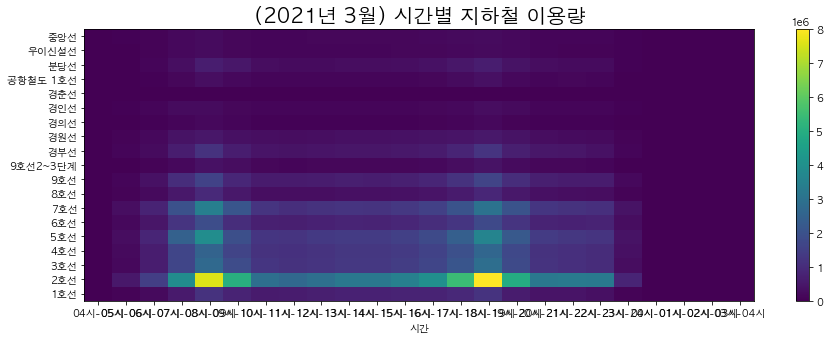

In [36]:
plt.figure(figsize=(15,5))
plt.pcolor(df)
plt.xticks(np.arange(0.5,len(df.columns),1),df.columns)
plt.yticks(np.arange(0.5,len(df.index),1),df.index)
plt.title('(2021년 3월) 시간별 지하철 이용량', fontsize=20)
plt.xlabel('시간')
plt.colorbar()

plt.show

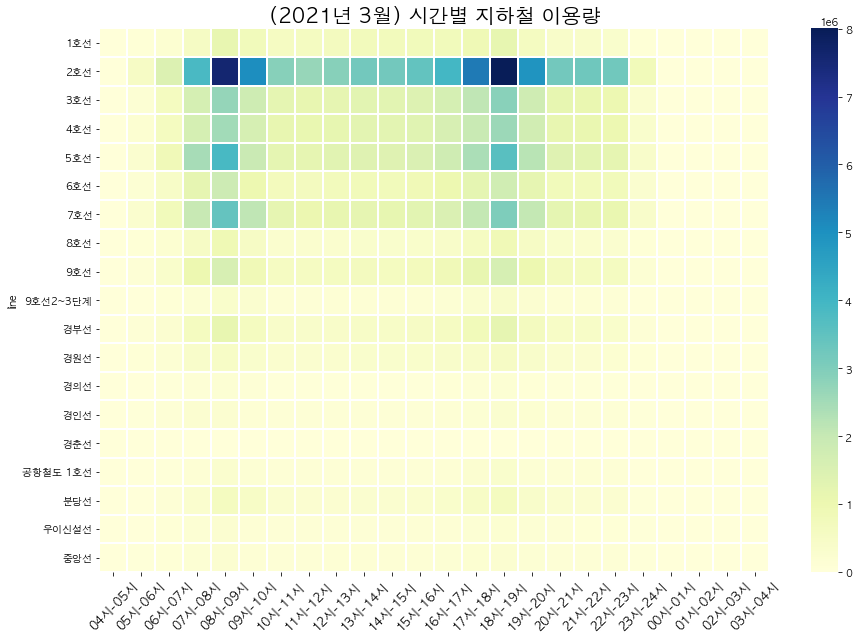

In [37]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df,
           annot=False, #숫자표시여부
           ax = ax, # 히트맵을 그릴 격자
           linewidths = 0.4, # 선 굵기
           linecolor = 'white',
           cmap = 'YlGnBu') #colormap YlOrRd  RdYlGn_r

plt.title('(2021년 3월) 시간별 지하철 이용량',size=20)
plt.xticks(rotation=45, size=12)
plt.show()

## ➡️ 시각화 자료를 보면 2호선은 08-09시, 18-19시에 가장 많이 이용한다
**따라서 코로나 이후에 2호선이 가장 많이 이용한 역 TOP10을 장악한 것은 출퇴근용으로 사용되고 있기 때문이다**

## **참고
2호선의 이용량이 많은건 단순히 역이 많기 때문은 아닐까 싶어서 알아보았다 <br>
(결론) 5호선이 가장 많고, 그 다음이 2호선!

In [87]:
df = pd.read_csv('data/서울시 지하철역 데이터.csv')
df = df[(df['사용월']>=201800) & (df['사용월']<202200)]
del df['Unnamed: 0']
del df['작업일자']
df

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원
729,202112,1호선,동대문,803,15,12276,1913,8716,5492,13464,...,2617,7679,24,1355,0,0,0,0,0,0
730,202112,1호선,동묘앞,116,0,2423,756,3270,3915,5412,...,980,2491,10,1437,1,1,0,1,0,0
731,202112,1호선,서울역,769,16,8460,6094,11185,35735,34375,...,12519,8703,61,841,0,2,0,0,0,0
732,202112,1호선,시청,37,2,1902,4537,2827,19095,6322,...,5284,1713,28,153,0,1,0,0,0,0
733,202112,1호선,신설동,383,6,7270,2738,7731,10318,15891,...,2280,5913,37,863,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18237,201801,중앙선,상봉,387,4,5302,886,7368,3044,20490,...,1527,6731,289,2137,0,0,0,0,0,0
18238,201801,중앙선,양원,3,0,1325,101,1924,1410,6069,...,216,1306,12,281,0,0,0,0,0,0
18239,201801,중앙선,양평,20,2,1568,177,2261,1525,11126,...,953,5013,162,1786,0,0,0,0,0,0
18240,201801,중앙선,중랑,29,0,4975,509,9419,2199,23173,...,1414,6208,86,1346,0,0,0,0,0,0


In [88]:
df_201803 = df[df['사용월']==201803]

In [89]:
df_201803

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원
17153,201803,1호선,동대문,664,12,15985,2421,12603,9076,21102,...,10058,14751,1175,4951,4,77,0,0,0,0
17154,201803,1호선,동묘앞,104,2,3548,813,3902,3774,7700,...,2913,5376,311,3579,2,224,0,0,0,0
17155,201803,1호선,서울역,994,18,11741,8346,14663,49537,40723,...,31091,23151,4354,8383,0,505,0,0,0,0
17156,201803,1호선,시청,121,1,2265,4463,3643,25817,7898,...,14514,4575,1093,1391,0,15,0,0,0,0
17157,201803,1호선,신설동,289,15,9027,2509,11045,7821,23302,...,6904,12962,691,3104,0,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17510,201803,중앙선,상봉,384,8,5420,910,8979,3437,23399,...,1842,7559,386,2452,0,0,0,0,0,0
17511,201803,중앙선,양원,6,0,1440,83,2249,1841,6447,...,162,1351,10,295,0,0,0,0,0,0
17512,201803,중앙선,양평,20,2,1529,131,2974,2209,13161,...,984,4861,157,1912,0,0,0,0,0,0
17513,201803,중앙선,중랑,46,0,5270,505,10721,2164,24776,...,1343,6467,109,1516,0,0,0,0,0,0


In [93]:
df_line = df_201803.value_counts('호선명')

In [94]:
df_line

호선명
5호선         51
2호선         44
6호선         38
7호선         38
3호선         33
4호선         26
9호선         25
경원선         17
우이신설선       13
경부선         12
경의선         12
분당선         11
8호선         11
1호선         10
중앙선          6
공항철도 1호선     5
9호선2단계       5
경인선          4
경춘선          1
dtype: int64